In [2]:
import numpy as np

In [3]:
crange = np.linspace(0, 5, 10000)
n_ap = []
N = int(100)

In [4]:
import networkx as nx

In [5]:
for c in crange:
    G = nx.erdos_renyi_graph(N, c / (N - 1))
    n_ap.append(len(list(nx.articulation_points(G))) / N)
n_ap = np.array(n_ap)

In [6]:
import matplotlib.pyplot as plt

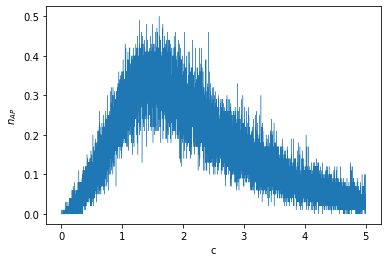

In [7]:
plt.plot(crange, n_ap, '-', lw=.4)
plt.xlabel('c')
plt.ylabel('$n_{AP}$');

In [8]:
def average_over(arr, nbatch):
    return arr.reshape((-1, nbatch)).mean(axis=1)

In [9]:
crange_ave = average_over(crange, 100)
n_ap_ave = average_over(n_ap, 100)

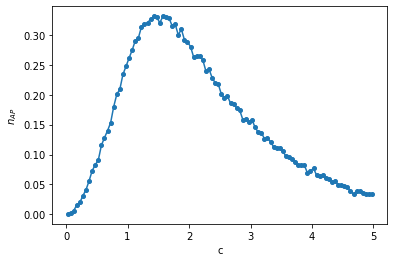

In [10]:
plt.plot(crange_ave, n_ap_ave, '-o', ms=4, lw=1.5)
# plt.plot(crange, nth, '-')
plt.xlabel('c')
plt.ylabel('$n_{AP}$');

In [11]:
import math

In [12]:
def P(k, c):
    return np.exp(-c) * c**k / math.factorial(k)


MAX_K = 150
def G(x, c):
    return sum(P(k, c) * x**k for k in range(MAX_K))

In [27]:
alpha0 = 1.
n_ap_ana = np.zeros_like(crange)
for i, c in enumerate(crange):
    G_val = G(0., c)
    n_ap_ana[i] = 1 - G_val - c * G_val

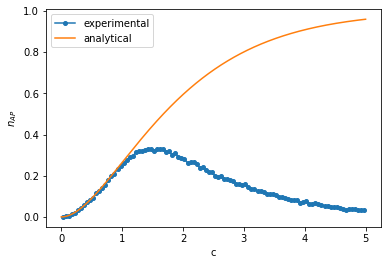

In [30]:
plt.plot(crange_ave, n_ap_ave, '-o', ms=4, lw=1.5, label='experimental')
plt.plot(crange, n_ap_ana, '-', label='analytical')
plt.xlabel('c')
plt.ylabel('$n_{AP}$')
plt.legend();